In [2]:
import os
os.environ.setdefault("TF_CPP_MIN_LOG_LEVEL", "2")  # Report only TF errors by default
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataset import Dataset
from pipeline import Pipeline
from visualizations import Visualizer
from sklearn.linear_model import Ridge
import sklearn.preprocessing
from sklearn.svm import LinearSVR, SVR
from sklearn.decomposition import PCA, KernelPCA
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_squared_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
rmse = MeanSquaredError(square_root = True)
from scipy.linalg import LinAlgWarning
import sklearn.model_selection
import warnings
# Filter out LinAlgWarning
warnings.filterwarnings("ignore", category=LinAlgWarning)
#controling whether tensorflow does recognize GPU
tf.config.get_visible_devices("GPU")
np.random.seed(42)
tf.random.set_seed(42)

In [3]:
#Inititate processing pipeline
pipeline = Pipeline(crypto_tick = "btc")
#Initiate visualizer
visualizer = Visualizer()

In [4]:
print("Missing values distribution:")
visualizer.get_missing_columns(data = pipeline.data)

Missing values distribution:


{'BTC / Capitalization, market, estimated supply, USD': [3092, '% 70.594'],
 'BTC / Volatility, daily returns, 180d': [11, '% 0.251'],
 'Wiki_btc_search': [1640, '% 37.443'],
 'Close_^DJI': [1360, '% 31.05'],
 'Close_^GSPC': [1360, '% 31.05'],
 'Close_GC=F': [1363, '% 31.119'],
 'Close_^VIX': [1360, '% 31.05'],
 'Close_^IXIC': [1360, '% 31.05'],
 'Close_SMH': [1360, '% 31.05'],
 'Close_VGT': [1360, '% 31.05'],
 'Close_XSD': [1360, '% 31.05'],
 'Close_IYW': [1360, '% 31.05'],
 'Close_FTEC': [2067, '% 47.192'],
 'Close_IGV': [1360, '% 31.05'],
 'Close_QQQ': [1360, '% 31.05'],
 'Wiki_crypto_search': [1640, '% 37.443'],
 'USD_EUR_rate': [161, '% 3.676'],
 'BTC-USD': [1353, '% 30.89']}

/tmp/ipykernel_1447/3485490685.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


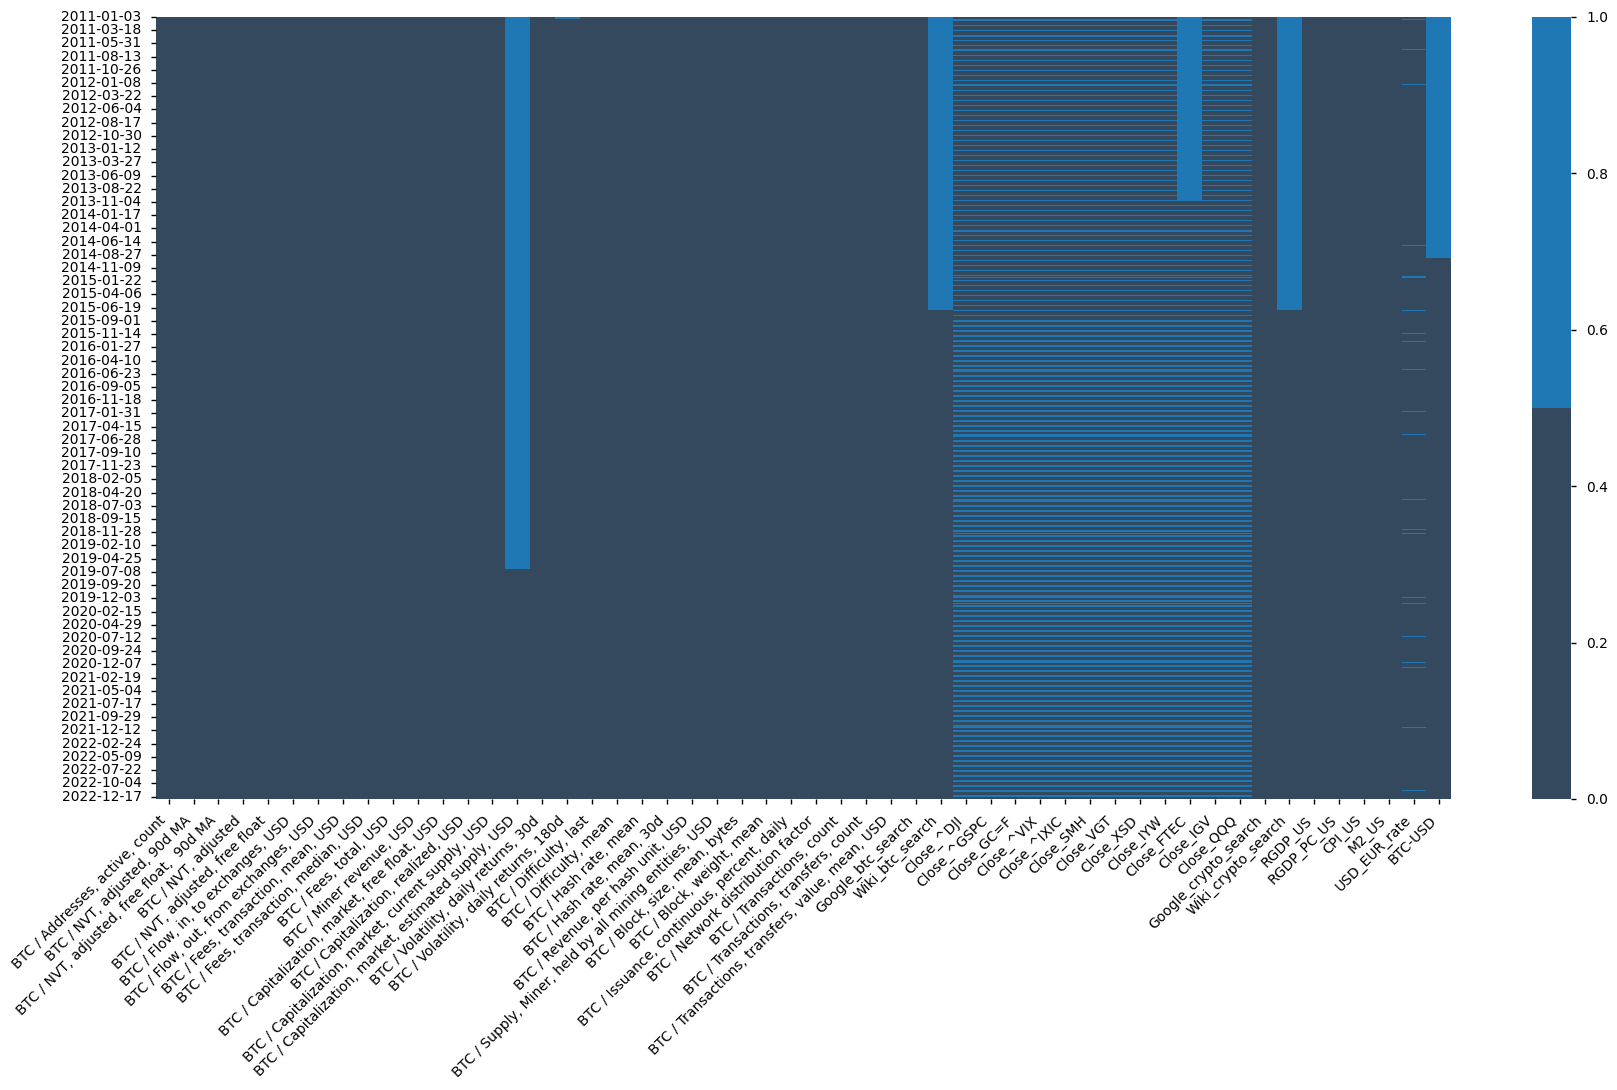

In [5]:

fig = visualizer.draw_missing_data(data = pipeline.data)
plt.tight_layout()
fig.savefig("./../text/Figures/BTC_missing_1.pdf", dpi=300, format="pdf")

fig.show()

In [6]:
pipeline.set_beginning(start_date = "2014-9-17")

/tmp/ipykernel_1447/2049177157.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


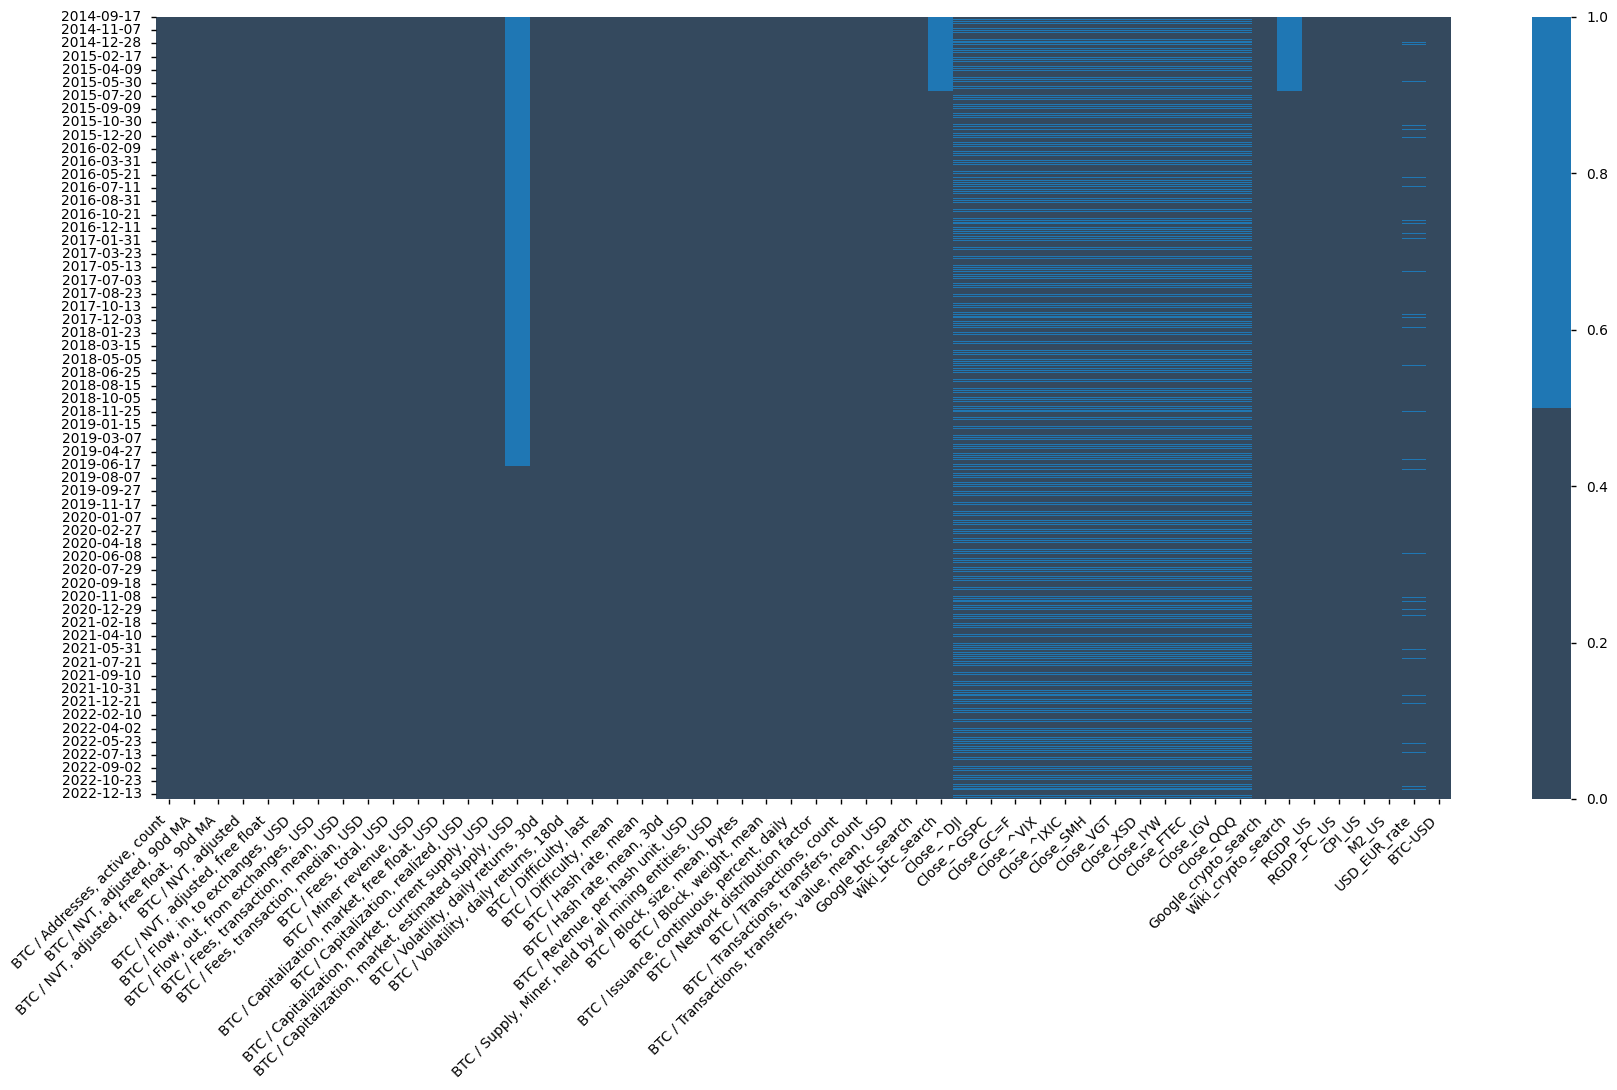

In [7]:
fig = visualizer.draw_missing_data(data = pipeline.data)
plt.tight_layout()
fig.savefig("../text/Figures/BTC_missing_2.pdf", dpi=300, format="pdf")
fig.show()

In [8]:
pipeline.preprocess_dataset()

/tmp/ipykernel_1447/523243249.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


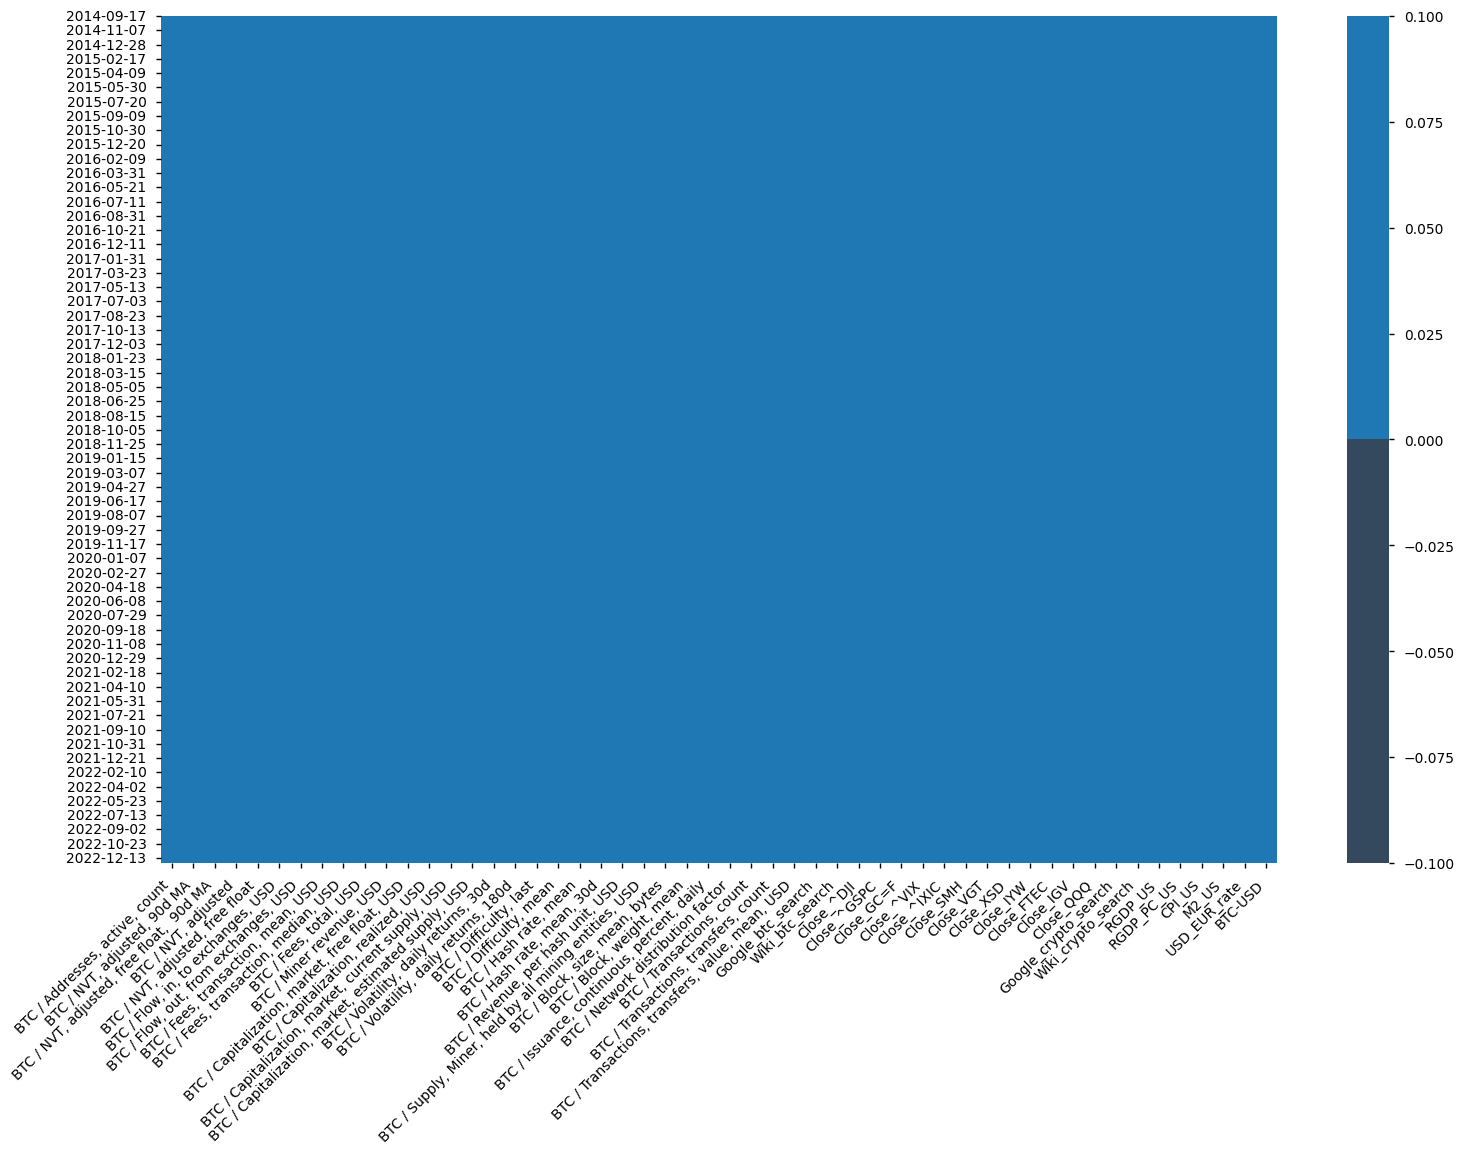

In [9]:
fig = visualizer.draw_missing_data(data = pipeline.data)
fig.show()

In [10]:
pipeline.shift_target()

In [11]:
pipeline.data_10d_shift

BTC / Addresses, active, count  BTC / NVT, adjusted, 90d MA  \
2014-09-17                        191063.0                    82.176970   
2014-09-18                        190890.0                    76.826435   
2014-09-19                        172255.0                    70.675713   
2014-09-20                        169941.0                    73.687502   
2014-09-21                        200712.0                    72.300627   
...                                    ...                          ...   
2022-12-16                        893040.0                    63.638479   
2022-12-17                        967830.0                    64.715648   
2022-12-18                        783263.0                    65.484320   
2022-12-19                        971140.0                    65.030832   
2022-12-20                        950486.0                    67.776046   

            BTC / NVT, adjusted, free float,  90d MA  BTC / NVT, adjusted  \
2014-09-17                                 76.651156           103.567097   
2014-09-18                                 71.646822            75.335079   
2014-09-19                                 65.897688            53.588317   
2014-09-20                                 68.691994            74.395015   
2014-09-21                                 67.387059            97.596787   
...                                              ...                  ...   
2022-12-16                                 46.708248            92.241011   
2022-12-17                                 47.484694           152.352954   
2022-12-18                                 48.038009           200.559814   
2022-12-19                                 47.686621           100.344436   
2022-12-20                                 49.687809           109.712204   

            BTC / NVT, adjusted, free float  \
2014-09-17                        96.602951   
2014-09-18                        70.256013   
2014-09-19                        49.965484   
2014-09-20                        69.351542   
2014-09-21                        90.964085   
...                                     ...   
2022-12-16                        67.701429   
2022-12-17                       111.788007   
2022-12-18                       147.126736   
2022-12-19                        73.581821   
2022-12-20                        80.431943   

            BTC / Flow, in, to exchanges, USD  \
2014-09-17                       1.065752e+07   
2014-09-18                       1.696480e+07   
2014-09-19                       1.770344e+07   
2014-09-20                       9.387692e+06   
2014-09-21                       1.050540e+07   
...                                       ...   
2022-12-16                       3.249423e+08   
2022-12-17                       2.299792e+08   
2022-12-18                       1.658453e+08   
2022-12-19                       3.266879e+08   
2022-12-20                       3.402596e+08   

            BTC / Flow, out, from exchanges, USD  \
2014-09-17                          9.743524e+06   
2014-09-18                          1.359548e+07   
2014-09-19                          1.694158e+07   
2014-09-20                          8.728492e+06   
2014-09-21                          1.089809e+07   
...                                          ...   
2022-12-16                          5.647839e+08   
2022-12-17                          3.900930e+08   
2022-12-18                          1.982145e+08   
2022-12-19                          3.518762e+08   
2022-12-20                          3.655936e+08   

            BTC / Fees, transaction, mean, USD  \
2014-09-17                            0.069971   
2014-09-18                            0.068289   
2014-09-19                            0.060801   
2014-09-20                            0.066003   
2014-09-21                            0.063093   
...                                        ...   
2022-12-16                            1.104805   
2022-12

# Creating results table

In [12]:
columns = ["BTC-LR - 1 day", "BTC-LR - 5 days", 
           "BTC-LR - 10 days", "BTC-SVR - 1 day", "BTC-SVR - 5 days", 
           "BTC-SVR - 10 days", "BTC-LSTM - 1 day", "BTC-LSTM - 5 days","BTC-LSTM - 10 days", "Naive forceast - 1 day", "Naive forceast - 5 days",
           "Naive forceast - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE which is the optimized metric
results_train_averaged = pd.DataFrame(columns = columns, index = rows)

In [13]:
columns = ["BTC-LR - 1 day", "BTC-LR - 5 days", 
           "BTC-LR - 10 days", "BTC-SVR - 1 day", "BTC-SVR - 5 days", "BTC-SVR - 10 days", 
           "BTC-LSTM - 1 day", "BTC-LSTM - 5 days","BTC-LSTM - 10 days", "Naive forceast - 1 day", "Naive forceast - 5 days",
           "Naive forceast - 10 days"]
rows = ["Full dimensionality", "95% retained variance",
        "98% retained variance", "99% retained variance"]
#presented in RMSE which is the optimized metric
results_test = pd.DataFrame(columns = columns, index = rows)

# Naive forecast baseline (predicting current price)

In [14]:
train_data_1, test_data_1, train_target_1, test_target_1 = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
train_data_5, test_data_5, train_target_5, test_target_5 = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
train_data_10, test_data_10, train_target_10, test_target_10 = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
results_train_averaged["Naive forceast - 1 day"] = rmse(train_target_1, train_data_1.iloc[:,-1])
results_train_averaged["Naive forceast - 5 days"] = rmse(train_target_5, train_data_5.iloc[:,-1])
results_train_averaged["Naive forceast - 10 days"] = rmse(train_target_10, train_data_10.iloc[:,-1])
results_test["Naive forceast - 1 day"] = rmse(test_target_1, test_data_1.iloc[:,-1])
results_test["Naive forceast - 5 days"] = rmse(test_target_5, test_data_5.iloc[:,-1])
results_test["Naive forceast - 10 days"] = rmse(test_target_10, test_data_10.iloc[:,-1])


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_The

# PCA retained variance on the whole dataset

/tmp/ipykernel_1447/3207946999.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


0.5234949509384339


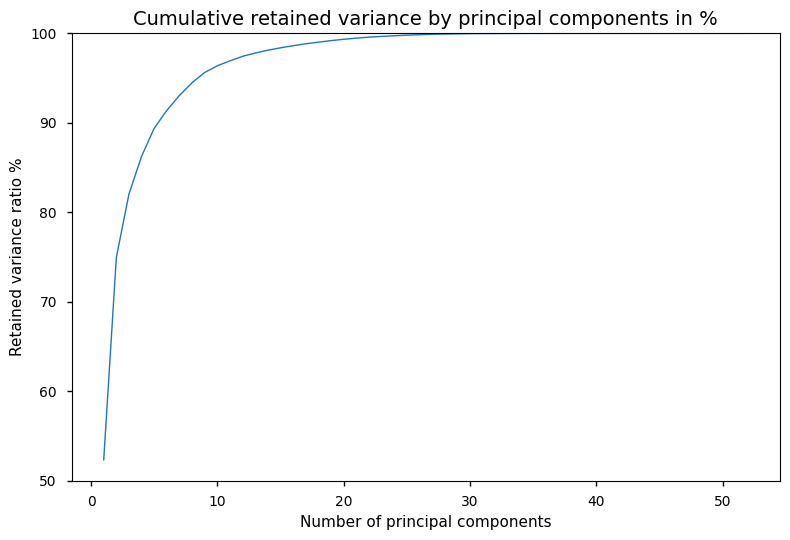

In [15]:
pca = PCA(random_state = 42)
scaler = sklearn.preprocessing.RobustScaler(unit_variance = True)
pca.fit_transform(scaler.fit_transform(pipeline.data_1d_shift.copy().iloc[:,:-1]))
fig = visualizer.draw_cumulative_varience_ratios(np.cumsum(pca.explained_variance_ratio_))
plt.tight_layout()
fig.savefig("../text/Figures/PCA_retained_variance.pdf", dpi=300, format="pdf")
fig.show()

In [16]:
print("Explained variance by component")
pca.explained_variance_ratio_

Explained variance by component


array([5.23494951e-01, 2.26074493e-01, 7.09551556e-02, 4.21864478e-02,
       3.12993313e-02, 1.99170745e-02, 1.67061055e-02, 1.42282766e-02,
       1.14412383e-02, 7.48856427e-03, 5.44767219e-03, 5.10793743e-03,
       3.64923464e-03, 3.18543300e-03, 2.61365122e-03, 2.40423765e-03,
       2.10572541e-03, 1.82252335e-03, 1.75171877e-03, 1.45810454e-03,
       1.27962371e-03, 1.14459785e-03, 7.93612001e-04, 7.14844567e-04,
       6.33197315e-04, 5.78263775e-04, 4.32270667e-04, 3.06006681e-04,
       2.42481801e-04, 1.74196458e-04, 9.40203062e-05, 6.26059034e-05,
       5.44289540e-05, 4.14747602e-05, 3.64873167e-05, 2.25268319e-05,
       1.57404864e-05, 1.05775696e-05, 8.77377953e-06, 4.50144776e-06,
       3.85086813e-06, 3.06882262e-06, 1.46273656e-06, 1.06299406e-06,
       7.59431093e-07, 5.51630576e-07, 3.34798093e-07, 3.08100509e-07,
       2.63028423e-07, 1.38253941e-07, 5.81129050e-08, 3.31639282e-08])

# Full dimensionality - baseline models

The pipeline is always shown for 1 day forecasting. 5 and 10 day forecasting is performed without further comments 

## Full dimensionality - Linear Regression

In [17]:
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [18]:
LR_PARAMETERS = {"estimator__alpha": np.linspace(0,5,20),
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52596e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52596e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52596e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.52596e-27): r

In [19]:
train_data.columns

Index(['BTC / Addresses, active, count', 'BTC / NVT, adjusted, 90d MA',
       'BTC / NVT, adjusted, free float,  90d MA', 'BTC / NVT, adjusted',
       'BTC / NVT, adjusted, free float', 'BTC / Flow, in, to exchanges, USD',
       'BTC / Flow, out, from exchanges, USD',
       'BTC / Fees, transaction, mean, USD',
       'BTC / Fees, transaction, median, USD', 'BTC / Fees, total, USD',
       'BTC / Miner revenue, USD',
       'BTC / Capitalization, market, free float, USD',
       'BTC / Capitalization, realized, USD',
       'BTC / Capitalization, market, current supply, USD',
       'BTC / Capitalization, market, estimated supply, USD',
       'BTC / Volatility, daily returns, 30d',
       'BTC / Volatility, daily returns, 180d', 'BTC / Difficulty, last',
       'BTC / Difficulty, mean', 'BTC / Hash rate, mean',
       'BTC / Hash rate, mean, 30d', 'BTC / Revenue, per hash unit, USD',
       'BTC / Supply, Miner, held by all mining entities, USD',
       'BTC / Block, size, mean, b

## Full dimensionality - 5 and 10 days - LR

In [20]:
#5 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.62638e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.62638e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.62638e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.62638e-27): r

## Full dimensionality - Support Vector Regression

In [21]:
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [22]:
SVR_PARAMETERS = {"estimator__C": np.logspace(-10,5,10),
    "estimator__epsilon": [1, 2, 3, 3.5, 4, 4.5, 5],
              "estimator__tol":[0.0001, 0.0005,0.001],
              "estimator__max_iter":[200,500,1000,2000]}
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

In [23]:
print(model.best_params_)
print(model.best_estimator_)
print(model.best_score_)

{'estimator__C': 2154.4346900318865, 'estimator__epsilon': 4.5, 'estimator__max_iter': 500, 'estimator__tol': 0.0001}
Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None), ('pack_up,', None),
                ('estimator',
                 LinearSVR(C=2154.4346900318865, epsilon=4.5, max_iter=500,
                           random_state=42))])
-938.0270303151128


## Full dimensionality - 5 and 10 days - SVR

In [24]:
#5 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)

#10 days SVR
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = None)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["Full dimensionality"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)


/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

/tmp/ipykernel_1447/2488864839.py:5: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


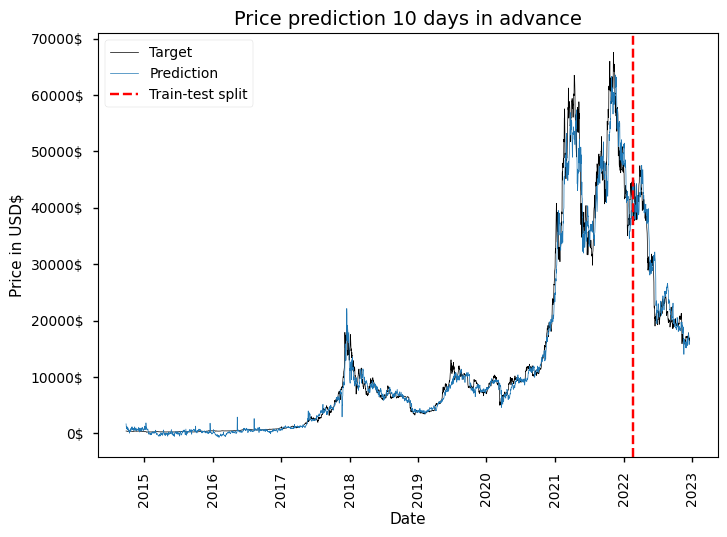

In [25]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

/tmp/ipykernel_1447/4071368209.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


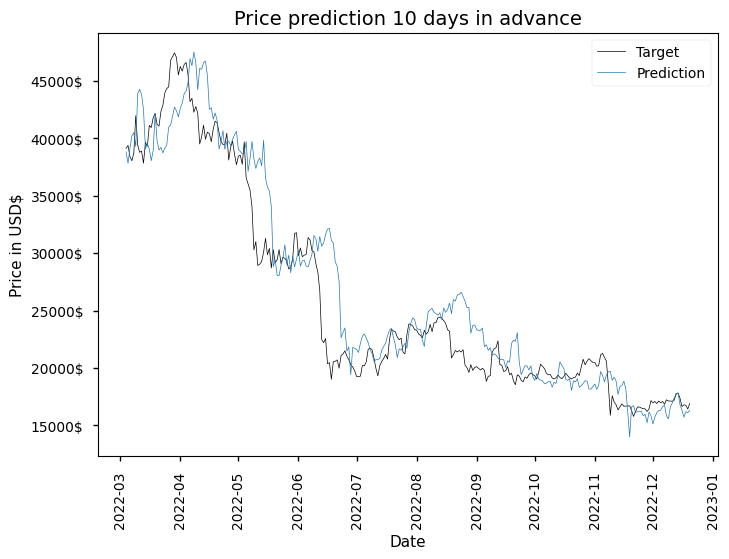

In [26]:
fig = visualizer.draw_prediction_test(test_target, test_prediction, 10)
fig.show()

## Full dimensionality - LTSM


In [27]:
len(pipeline.data_1d_shift.columns)

53

In [ ]:
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=1, random_state = 42, shuffle = True, 
                    batch_size = 200,epochs=300, input_shape=(6, 52),
                    units = 500), dim_reducer = None, shape_change = ((-1, 52), (-1,6,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', None), ('scaler 2', None),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 6, 52))),
                ('estimator',
                 KerasRegressor(batch_size=200, build_fn=<function Pipeline.assembly_lstm at 0x7fcc22e5f560>, epochs=300, input_shape=(6, 52), random_state=42, units=500))])

In [30]:
LSTM_PARAMETERS = {"estimator__units": [500],
    "estimator__epochs": [300]}
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 6)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs =None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(train_target.reshape(-1,1)), minimax.inverse_transform(model.predict(train_data).reshape(-1,1)))
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
5/5 [==============================] - 6s 17ms/step - loss: 1.5861
Epoch 2/300
5/5 [==============================] - 0s 11ms/step - loss: 0.5120
Epoch 3/300
5/5 [==============================] - 0s 12ms/step - loss: 0.3119
Epoch 4/300
5/5 [==============================] - 0s 17ms/step - loss: 0.2295
Epoch 5/300
5/5 [==============================] - 0s 13ms/step - loss: 0.2052
Epoch 6/300
5/5 [==============================] - 0s 13ms/step - loss: 0.1355
Epoch 7/300
5/5 [==============================] - 0s 12ms/step - loss: 0.1117
Epoch 8/300
5/5 [==============================] - 0s 12ms/step - loss: 0.0808
Epoch 9/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0685
Epoch 10/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0534
Epoch 11/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0421
Epoch 12/300
5/5 [==============================] - 0s 10ms/step - loss: 0.0373
Epoch 13/300
5/5 [==============================] 

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
10/10 [==============================] - 3s 9ms/step - loss: 1.1164
Epoch 2/300
10/10 [==============================] - 0s 10ms/step - loss: 0.2765
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1671
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0965
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0661
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0436
Epoch 7/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0337
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/300
10/10 [==============================] - 0s 10ms/step - loss: 0.0266
Epoch 10/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0258
Epoch 11/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 12/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0186
Epoch 13/300
10/10 [===============

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
14/14 [==============================] - 3s 8ms/step - loss: 0.8718
Epoch 2/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1976
Epoch 3/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1073
Epoch 4/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0691
Epoch 5/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0484
Epoch 6/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0424
Epoch 7/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0374
Epoch 8/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 9/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0346
Epoch 10/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0339
Epoch 11/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0362
Epoch 12/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0280
Epoch 13/300
14/14 [=================

In [31]:
model.best_params_
model.best_score_


-0.2486178885981099

2/2 [==============================] - 0s 4ms/step


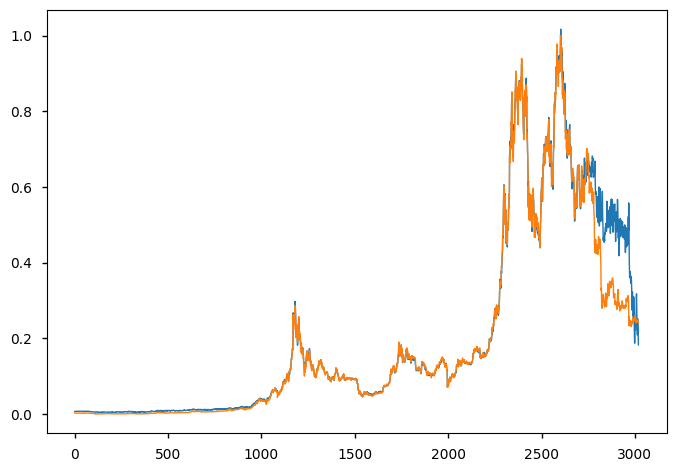

In [33]:
plt.plot(np.concatenate([model.predict(train_data), model.predict(test_data)]), linewidth=1)
plt.plot(np.concatenate([train_target,test_target]), linewidth=1)

In [37]:
results_train_averaged

BTC-LR - 1 day BTC-LR - 5 days BTC-LR - 10 days  \
Full dimensionality       -1600.7917    -4599.079811     -6115.906077   
95% retained variance            NaN             NaN              NaN   
98% retained variance            NaN             NaN              NaN   
99% retained variance            NaN             NaN              NaN   

                      BTC-SVR - 1 day BTC-SVR - 5 days BTC-SVR - 10 days  \
Full dimensionality        -938.02703     -2578.273139      -4655.219749   
95% retained variance             NaN              NaN               NaN   
98% retained variance             NaN              NaN               NaN   
99% retained variance             NaN              NaN               NaN   

                      BTC-LSTM - 1 day BTC-LSTM - 5 days BTC-LSTM - 10 days  \
Full dimensionality         447.636127               NaN                NaN   
95% retained variance              NaN               NaN                NaN   
98% retained variance              NaN               NaN                NaN   
99% retained variance              NaN               NaN                NaN   

                       Naive forceast - 1 day  Naive forceast - 5 days  \
Full dimensionality                781.932213              1734.914339   
95% retained variance              781.932213              1734.914339   
98% retained variance              781.932213              1734.914339   
99% retained variance              781.932213              1734.914339   

                       Naive forceast - 10 days  
Full dimensionality                 2501.060798  
95% retained variance               2501.060798  
98% retained variance               2501.060798  
99% retained variance               2501.060798

In [38]:
results_test

BTC-LR - 1 day BTC-LR - 5 days BTC-LR - 10 days  \
Full dimensionality       973.139503     2403.181942      3786.815076   
95% retained variance            NaN             NaN              NaN   
98% retained variance            NaN             NaN              NaN   
99% retained variance            NaN             NaN              NaN   

                      BTC-SVR - 1 day BTC-SVR - 5 days BTC-SVR - 10 days  \
Full dimensionality        935.680342      2314.128935       3119.122371   
95% retained variance             NaN              NaN               NaN   
98% retained variance             NaN              NaN               NaN   
99% retained variance             NaN              NaN               NaN   

                      BTC-LSTM - 1 day BTC-LSTM - 5 days BTC-LSTM - 10 days  \
Full dimensionality       10281.512152               NaN                NaN   
95% retained variance              NaN               NaN                NaN   
98% retained variance              NaN               NaN                NaN   
99% retained variance              NaN               NaN                NaN   

                       Naive forceast - 1 day  Naive forceast - 5 days  \
Full dimensionality                905.500028              2068.261346   
95% retained variance              905.500028              2068.261346   
98% retained variance              905.500028              2068.261346   
99% retained variance              905.500028              2068.261346   

                       Naive forceast - 10 days  
Full dimensionality                  2985.21908  
95% retained variance                2985.21908  
98% retained variance                2985.21908  
99% retained variance                2985.21908

## Full dimensionality - 5 and 10 days - LSTM

In [40]:
#5 days LSTM
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=1, random_state = 42, shuffle = True, 
                    batch_size = 200,epochs=300, input_shape=(6, 52),
                    units = 500), dim_reducer = None, shape_change = ((-1, 52), (-1,6,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 6)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=1, random_state = 42, shuffle = True, 
                    batch_size = 200,epochs=300, input_shape=(6, 52),
                    units = 500), dim_reducer = None, shape_change = ((-1, 52), (-1,6,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 6)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["Full dimensionality"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["Full dimensionality"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
5/5 [==============================] - 3s 11ms/step - loss: 1.5861
Epoch 2/300
5/5 [==============================] - 0s 10ms/step - loss: 0.5120
Epoch 3/300
5/5 [==============================] - 0s 9ms/step - loss: 0.3119
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 0.2295
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 0.2052
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 0.1355
Epoch 7/300
5/5 [==============================] - 0s 9ms/step - loss: 0.1117
Epoch 8/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0808
Epoch 9/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0685
Epoch 10/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0534
Epoch 11/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0421
Epoch 12/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0373
Epoch 13/300
5/5 [==============================] - 0s 9m

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
10/10 [==============================] - 3s 9ms/step - loss: 1.1164
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 0.2765
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1671
Epoch 4/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0965
Epoch 5/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0661
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0436
Epoch 7/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0266
Epoch 10/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 11/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 12/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 13/300
10/10 [=================

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
14/14 [==============================] - 2s 9ms/step - loss: 0.8718
Epoch 2/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1976
Epoch 3/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1073
Epoch 4/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0691
Epoch 5/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0484
Epoch 6/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0424
Epoch 7/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0374
Epoch 8/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0352
Epoch 9/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0346
Epoch 10/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 11/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0362
Epoch 12/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0280
Epoch 13/300
14/14 [=================

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
5/5 [==============================] - 2s 10ms/step - loss: 1.5861
Epoch 2/300
5/5 [==============================] - 0s 10ms/step - loss: 0.5120
Epoch 3/300
5/5 [==============================] - 0s 10ms/step - loss: 0.3119
Epoch 4/300
5/5 [==============================] - 0s 9ms/step - loss: 0.2295
Epoch 5/300
5/5 [==============================] - 0s 9ms/step - loss: 0.2052
Epoch 6/300
5/5 [==============================] - 0s 9ms/step - loss: 0.1355
Epoch 7/300
5/5 [==============================] - 0s 9ms/step - loss: 0.1117
Epoch 8/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0808
Epoch 9/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0685
Epoch 10/300
5/5 [==============================] - 0s 9ms/step - loss: 0.0534
Epoch 11/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0421
Epoch 12/300
5/5 [==============================] - 0s 8ms/step - loss: 0.0373
Epoch 13/300
5/5 [==============================] - 0s 8ms

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
10/10 [==============================] - 2s 9ms/step - loss: 1.1164
Epoch 2/300
10/10 [==============================] - 0s 9ms/step - loss: 0.2765
Epoch 3/300
10/10 [==============================] - 0s 9ms/step - loss: 0.1671
Epoch 4/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0965
Epoch 5/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0661
Epoch 6/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0436
Epoch 7/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0337
Epoch 8/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0299
Epoch 9/300
10/10 [==============================] - 0s 9ms/step - loss: 0.0266
Epoch 10/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0258
Epoch 11/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0204
Epoch 12/300
10/10 [==============================] - 0s 8ms/step - loss: 0.0186
Epoch 13/300
10/10 [=================

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/300
14/14 [==============================] - 2s 9ms/step - loss: 0.8718
Epoch 2/300
14/14 [==============================] - 0s 9ms/step - loss: 0.1976
Epoch 3/300
14/14 [==============================] - 0s 8ms/step - loss: 0.1073
Epoch 4/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0691
Epoch 5/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0484
Epoch 6/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0424
Epoch 7/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0374
Epoch 8/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0352
Epoch 9/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0346
Epoch 10/300
14/14 [==============================] - 0s 9ms/step - loss: 0.0339
Epoch 11/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0362
Epoch 12/300
14/14 [==============================] - 0s 8ms/step - loss: 0.0280
Epoch 13/300
14/14 [=================

# Retained 95% of variance

## Retained 95% of variance - Linear Regression

In [41]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [42]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [43]:
#5 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 95% of variance - Support Vector Regression

In [44]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [45]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 95% of variance - 5 and 10 days - SVR

In [46]:
#5 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["95% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 95% of variance - LSTM

In [47]:
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.95))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 52))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7fcc22e5f560>, epochs=500, input_shape=(1, 52), random_state=42, shuffle=False, units=2000, verbose=0))])

In [48]:
results_test

BTC-LR - 1 day BTC-LR - 5 days BTC-LR - 10 days  \
Full dimensionality       973.139503     2403.181942      3786.815076   
95% retained variance    5724.696105     6221.758073      6355.033932   
98% retained variance            NaN             NaN              NaN   
99% retained variance            NaN             NaN              NaN   

                      BTC-SVR - 1 day BTC-SVR - 5 days BTC-SVR - 10 days  \
Full dimensionality        935.680342      2314.128935       3119.122371   
95% retained variance     6204.704219      6656.365998       6553.392751   
98% retained variance             NaN              NaN               NaN   
99% retained variance             NaN              NaN               NaN   

                      BTC-LSTM - 1 day BTC-LSTM - 5 days BTC-LSTM - 10 days  \
Full dimensionality       10281.512152      10281.512152       10281.512152   
95% retained variance              NaN               NaN                NaN   
98% retained variance              NaN               NaN                NaN   
99% retained variance              NaN               NaN                NaN   

                       Naive forceast - 1 day  Naive forceast - 5 days  \
Full dimensionality                905.500028              2068.261346   
95% retained variance              905.500028              2068.261346   
98% retained variance              905.500028              2068.261346   
99% retained variance              905.500028              2068.261346   

                       Naive forceast - 10 days  
Full dimensionality                  2985.21908  
95% retained variance                2985.21908  
98% retained variance                2985.21908  
99% retained variance                2985.21908

In [49]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## Retained 95% of variance - 5 and 10 days - LSTM

In [50]:
#5 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.95)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["95% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["95% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be rename

# Retained 98% of variance

## Retained 98% of variance - Linear Regression

In [51]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [52]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift)
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [53]:
#5 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 98% of variance - Support Vector Regression

In [54]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [55]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 98% of variance - 5 and 10 days - SVR

In [56]:
#5 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["98% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

## Retained 98% of variance - LSTM

In [57]:
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

Pipeline(steps=[('pack_down', ReshapeTransformer(new_shape=(-1, 52))),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.98))),
                ('scaler 2', StandardScaler()),
                ('pack_up,', ReshapeTransformer(new_shape=(-1, 1, 52))),
                ('estimator',
                 KerasRegressor(batch_size=70, build_fn=<function Pipeline.assembly_lstm at 0x7fcc22e5f560>, epochs=500, input_shape=(1, 52), random_state=42, shuffle=False, units=2000, verbose=0))])

In [58]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


## Retained 98% of variance - 5 and 10 days - LSTM

In [59]:
#5 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.98)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["98% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["98% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be rename

# Retained 99% of variance

## Retained 99% of variance - Linear Regression

In [60]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', Ridge(random_state=42))])

In [61]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(


In [62]:
#5 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days LR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = Ridge(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-LR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:477: UserWarning: y_pred and y_true do not have the same column index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sktime/performance_metrics/forecasting/_classes.py:465: UserWarning: y_pred and y_true do not have the same row index. This may indicate incorrect objects passed to the metric. Indices of y_true will be used for y_pred.
  warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/li

## Retained 99% of variance - Support Vector Regression

In [63]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
pipe

Pipeline(steps=[('pack_down', None),
                ('scaler', RobustScaler(unit_variance=True)),
                ('denoiser', PCATransformer(pca=PCA(n_components=0.99))),
                ('scaler 2', StandardScaler()), ('pack_up,', None),
                ('estimator', LinearSVR(random_state=42))])

In [ ]:
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_1d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 1 day"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

: 

In [ ]:
#5 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_5d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 5 days"]] = rmse(test_target,
                                                                prediction)
#10 days SVR
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = LinearSVR(random_state = 42), dim_reducer = pca)
train_data, test_data, train_target, test_target = Pipeline.split_train_test(pipeline.
                                                                data_10d_shift.copy())
model = Pipeline.fit_grid_search(train_data, train_target, pipe, SVR_PARAMETERS)
results_train_averaged.loc[["99% retained variance"],["BTC-SVR - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-SVR - 10 days"]] = rmse(test_target,
                                                                prediction)

/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/tomas_barhon/Code/Bachelor thesis/Bachelor_Thesis/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change f

In [ ]:
test_prediction = pd.Series(prediction, index=test_data.index)
train_pred = pd.Series(model.predict(train_data), index=train_data.index)
visualizer = Visualizer()
fig = visualizer.draw_prediction_full(train_target,train_pred, test_target, test_prediction, 10)
fig.show()

## Retained 99% of variance - LSTM

In [ ]:
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
pipe

In [ ]:
x,y = Pipeline.create_lstm_input(pipeline.data_1d_shift.copy(), pipeline.data_1d_shift.copy().iloc[:,-1], 1, 1)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 1 day"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 1 day"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

In [ ]:
#5 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_5d_shift.copy(), pipeline.data_5d_shift.copy().iloc[:,-1], 1, 5)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 5 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 5 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))
#10 days LSTM
pca = PCA(n_components = 0.99)
pipe = Pipeline.assembly_pipeline(estimator = KerasRegressor(build_fn = Pipeline.assembly_lstm,
                    verbose=0, random_state = 42, shuffle = False, 
                    batch_size = 70,epochs=500, input_shape=(1, 52),
                    units = 2000), dim_reducer = pca, shape_change = ((-1, 52), (-1,1,52)))
x,y = Pipeline.create_lstm_input(pipeline.data_10d_shift.copy(), pipeline.data_10d_shift.copy().iloc[:,-1], 1, 10)
train_data, test_data, train_target, test_target = Pipeline.split_train_test([x,y], pandas = False)
minimax = sklearn.preprocessing.MinMaxScaler((0,1))
train_target = np.squeeze(minimax.fit_transform(train_target.reshape(-1, 1)))
test_target = np.squeeze(minimax.transform(test_target.reshape(-1, 1)))
model = Pipeline.fit_grid_search(train_data, train_target, pipe, LSTM_PARAMETERS, n_jobs = None)
results_train_averaged.loc[["99% retained variance"],["BTC-LSTM - 10 days"]] = model.best_score_
prediction = model.predict(test_data)
results_test.loc[["99% retained variance"],["BTC-LSTM - 10 days"]] = rmse(minimax.inverse_transform(test_target.reshape(-1,1)), 
                                                                      minimax.inverse_transform(model.predict(test_data).reshape(-1,1)))

In [ ]:
results_test